# Initial budget

In [1]:
budget = 300000

# Prepare data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/portfolio_optimization.csv", index_col="TRADEDATE")

In [4]:
df.head()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.0,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.7,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.4,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.4,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.5,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0


In [5]:
# save assets list
assets = df.columns[1:]
assets

Index(['ROSN', 'NVTK', 'LKOH', 'GMKN', 'SBER', 'PLZL', 'NLMK', 'SNGS', 'TATN',
       'YNDX', 'ALRS', 'POLY', 'MGNT'],
      dtype='object')

In [6]:
df.isnull().sum()

GAZP     7
ROSN     7
NVTK     7
LKOH     7
GMKN     7
SBER     7
PLZL     7
NLMK     7
SNGS     7
TATN     7
YNDX    10
ALRS     7
POLY    10
MGNT     7
dtype: int64

## To float

In [7]:
for col in df.columns:
    df[col] = df[col].astype("float64")

In [8]:
df.head()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.0,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.7,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.4,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.4,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.5,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0


## Delete rows with nan

In [9]:
for col in df.columns:
    df = df[df[col].notna()]

In [10]:
df.isnull().sum()

GAZP    0
ROSN    0
NVTK    0
LKOH    0
GMKN    0
SBER    0
PLZL    0
NLMK    0
SNGS    0
TATN    0
YNDX    0
ALRS    0
POLY    0
MGNT    0
dtype: int64

# Draw graph

<AxesSubplot:xlabel='TRADEDATE'>

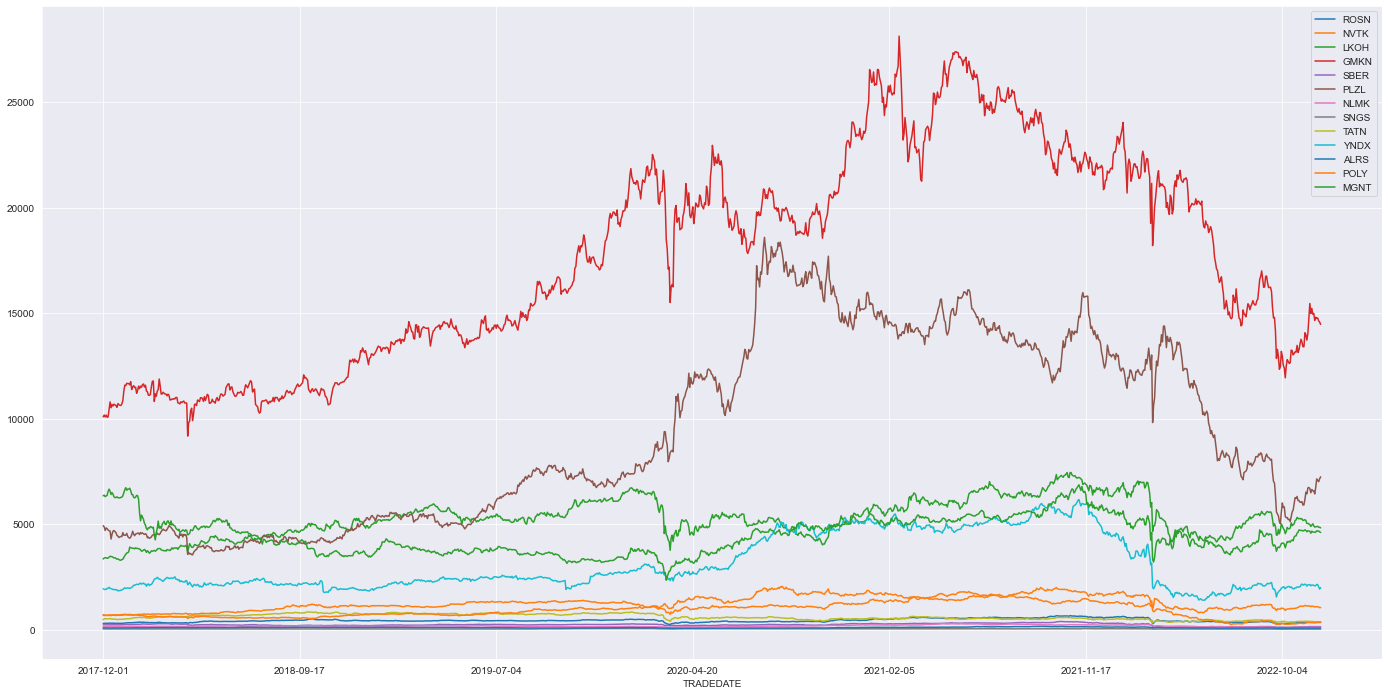

In [11]:
_, ax = plt.subplots(figsize=(24, 12))
df[assets].plot(ax=ax)

# Log normalization

In [12]:
log_ret = np.log(df[assets] / df[assets].shift(1))
log_ret.head()

,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,0.002394,0.003761,0.01381,0.008496,0.013898,-0.010625,0.030925,-0.010887,0.106567,-0.012766,-0.026400,-0.020643,0.004721
2017-12-05,0.002389,0.005689,0.00368,-0.008793,-0.003077,-0.035759,-0.002609,-0.002740,-0.009331,-0.004204,-0.006777,-0.027013,-0.011050
2017-12-06,-0.003414,0.004766,0.00000,0.008793,-0.000715,0.024812,0.035205,0.023862,0.008255,0.000526,0.010610,-0.009119,0.005540
2017-12-07,0.000342,0.006074,-0.00841,-0.010183,-0.017766,-0.007295,0.003166,-0.011499,-0.007663,0.025719,-0.013013,0.001501,0.003152


# Monte Carlo

## init arrays

In [13]:
num_iterations = 10000

In [14]:
weights_array = np.zeros((num_iterations, len(assets)))
return_array = np.zeros(num_iterations)
variance_array = np.zeros(num_iterations)
sharpe_arr = np.zeros(num_iterations)

## repeat num_iterations times

In [15]:
for i in range(num_iterations):
    local_weights = np.array(np.random.random(len(assets)))
    local_weights = local_weights / np.sum(local_weights)

    weights_array[i, :] = local_weights
    return_array[i] = np.sum((log_ret.mean() * local_weights) * 252)
    variance_array[i] = np.sqrt(np.dot(local_weights.T, np.dot(log_ret.cov() * 252, local_weights)))
    sharpe_arr[i] = return_array[i] / variance_array[i]

## show max ratio

In [16]:
sharpe_arr.max()

0.12226400000686474

In [17]:
optimal_weights = weights_array[sharpe_arr.argmax(), :]
max_return = return_array[sharpe_arr.argmax()]
max_variance = variance_array[sharpe_arr.argmax()]
f"Max return {round(max_return * 100, 2)}, Max_variance: {round(max_variance * 100, 2)}"

'Max return 3.3, Max_variance: 26.97'

## draw graph

C:\Users\andrey\AppData\Local\Temp\ipykernel_19684\1584339502.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


Text(0, 0.5, 'Return')

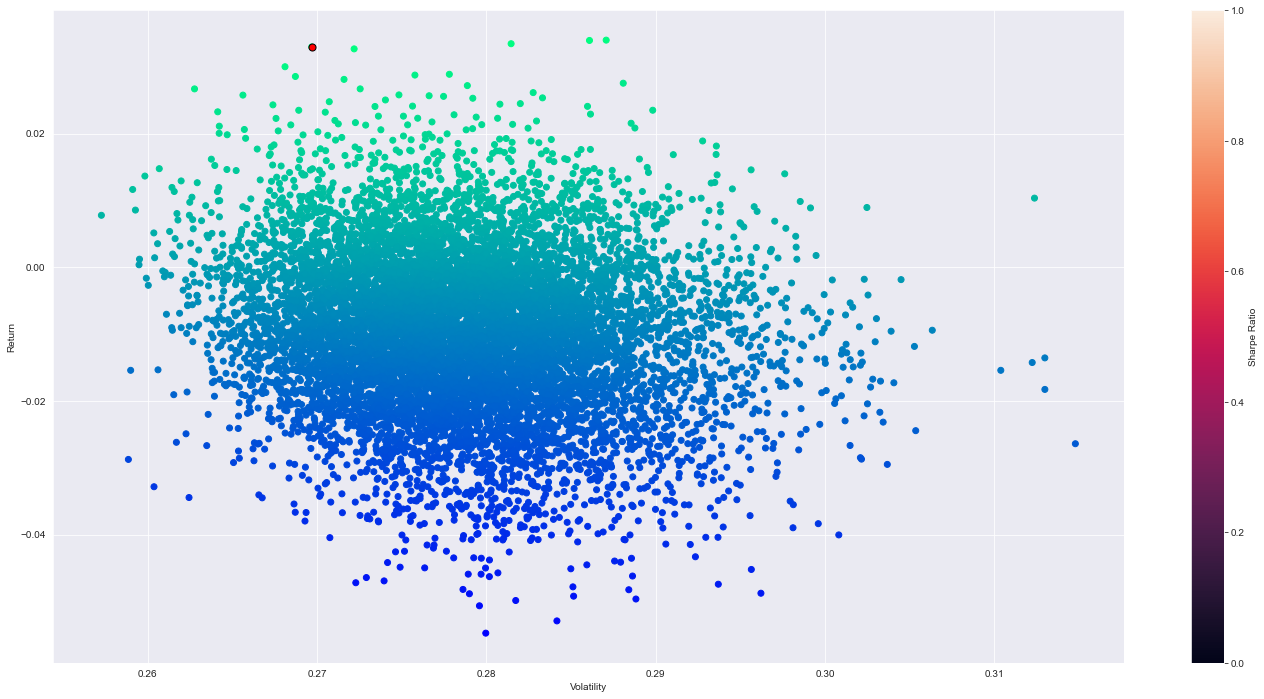

In [18]:
plt.figure(figsize=(24,12))
plt.scatter(variance_array, return_array, c=sharpe_arr, cmap='winter')
plt.scatter(max_variance,max_return, c='red', s=50, edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

## show result as table

In [19]:
pd.DataFrame({
    "position": [round(weight * budget, 2) for weight in optimal_weights],
    "percent": [round(weight * 100, 2) for weight in optimal_weights]
}, index=assets).sort_values('percent', ascending=False)

,position,percent
GMKN,50640.72,16.88
NVTK,43604.66,14.53
YNDX,40080.08,13.36
LKOH,39301.08,13.10
PLZL,36572.11,12.19
SNGS,22712.31,7.57
ALRS,21994.78,7.33
NLMK,19442.29,6.48
ROSN,9594.58,3.20
MGNT,7738.66,2.58
